<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10><b>Neural Networks Project</b></font></center>

<center><font size=6><b>PART A</b></font></center>

### **Business Context**

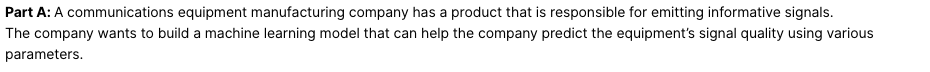

### **Objective**

### **Data Dictionary**

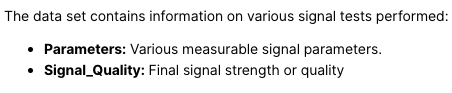

<br><br>

## Import the necessary libraries

In [3]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

# Suppressing the warnings.
import warnings
warnings.filterwarnings("ignore")

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

## Importing the dataset

In [ ]:
data = pd.read_csv('NN Project Data - Signal.csv')

<br>

## Data Overview

**View the first and last 5 rows of the dataset**

In [3]:
data.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.tail()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


<br>

**Understand the shape of the dataset**

In [5]:
# checking shape of the data
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 1599 rows and 12 columns.


**Check the data types of the columns for the dataset**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<br>

### Check for missing values

**Check the null columns for the dataset**

In [7]:
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
pd.DataFrame({'Missing_Values': missing_values, 'Missing_Percentage': missing_percentage})

,Missing_Values,Missing_Percentage
Parameter 1,0,0.0
Parameter 2,0,0.0
Parameter 3,0,0.0
Parameter 4,0,0.0
Parameter 5,0,0.0
Parameter 6,0,0.0
Parameter 7,0,0.0
Parameter 8,0,0.0
Parameter 9,0,0.0
Parameter 10,0,0.0


**Check the NA columns for the dataset**

In [8]:
missing_values = data.isna().sum()
missing_percentage = (missing_values / len(data)) * 100
pd.DataFrame({'Missing_Values': missing_values, 'Missing_Percentage': missing_percentage})

,Missing_Values,Missing_Percentage
Parameter 1,0,0.0
Parameter 2,0,0.0
Parameter 3,0,0.0
Parameter 4,0,0.0
Parameter 5,0,0.0
Parameter 6,0,0.0
Parameter 7,0,0.0
Parameter 8,0,0.0
Parameter 9,0,0.0
Parameter 10,0,0.0


**Check the duplicate data for the dataset**

In [9]:
data.duplicated().sum()

240

In [10]:
data[data.duplicated()]

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


**Check the unique values for each parameter and signal strength**

In [11]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values for {column}: {unique_values}\n")

Unique values for Parameter 1: [ 7.4  7.8 11.2  7.9  7.3  7.5  6.7  5.6  8.9  8.5  8.1  7.6  6.9  6.3
  7.1  8.3  5.2  5.7  8.8  6.8  4.6  7.7  8.7  6.4  6.6  8.6 10.2  7.
  7.2  9.3  8.   9.7  6.2  5.   4.7  8.4 10.1  9.4  9.   8.2  6.1  5.8
  9.2 11.5  5.4  9.6 12.8 11.  11.6 12.  15.  10.8 11.1 10.  12.5 11.8
 10.9 10.3 11.4  9.9 10.4 13.3 10.6  9.8 13.4 10.7 11.9 12.4 12.2 13.8
  9.1 13.5 10.5 12.6 14.  13.7  9.5 12.7 12.3 15.6  5.3 11.3 13.   6.5
 12.9 14.3 15.5 11.7 13.2 15.9 12.1  5.1  4.9  5.9  6.   5.5]

Unique values for Parameter 2: [0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.5   0.615 0.61  0.62
 0.56  0.59  0.32  0.22  0.39  0.43  0.49  0.4   0.41  0.71  0.645 0.675
 0.685 0.655 0.605 0.38  1.13  0.45  0.67  0.52  0.935 0.29  0.31  0.51
 0.42  0.63  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3   0.55  1.02
 0.775 0.9   0.545 0.575 0.33  0.54  1.07  0.695 1.33  0.745 1.04  0.715
 0.415 0.34  0.68  0.95  0.53  0.64  0.885 0.805 0.73  0.37  0.835 1.09
 0.57  0.44  0.6

**Remove duplicate data from the dataset**

In [12]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [13]:
# checking shape of the data
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 1359 rows and 12 columns.


### Summary
* There are 12 columns, consists of 11 parameters and one target variable
* There is no missing data.
* There were 240 duplicates, which have been removed.
* No treatment required for missing data.

<br>

## Data Analysis & Visualization

### Target Variable: Signal_Strength

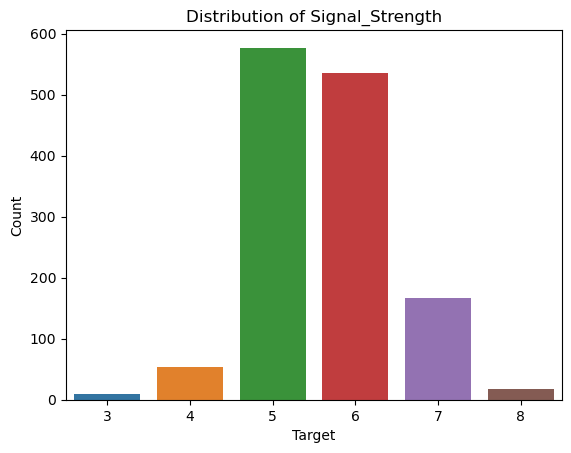

In [14]:
sns.countplot(x='Signal_Strength', data=data)
plt.title('Distribution of Signal_Strength')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

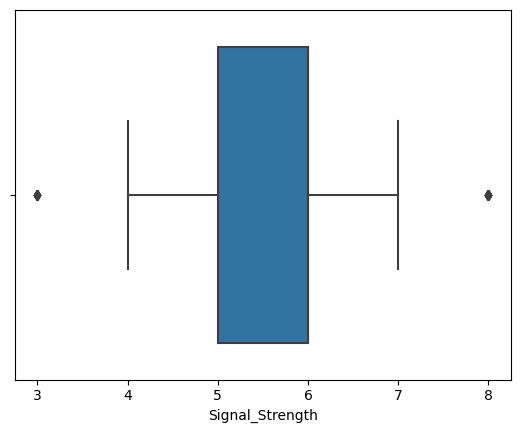

In [15]:
sns.boxplot(data, x='Signal_Strength')
plt.show()

**Observations**
* There are very few outliers.

In [16]:
print(data['Signal_Strength'].value_counts())
print(data['Signal_Strength'].dtype)

Signal_Strength
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64
int64


<br>

#### Correlation Check against Target Variable: Signal_Strength

In [17]:
correlation_matrix = data.corr(numeric_only=True) 
signal_corr = correlation_matrix['Signal_Strength'].drop('Signal_Strength')
print(signal_corr.sort_values(ascending=False))

Parameter 11    0.480343
Parameter 10    0.248835
Parameter 3     0.228057
Parameter 1     0.119024
Parameter 4     0.013640
Parameter 6    -0.050463
Parameter 9    -0.055245
Parameter 5    -0.130988
Parameter 7    -0.177855
Parameter 8    -0.184252
Parameter 2    -0.395214
Name: Signal_Strength, dtype: float64


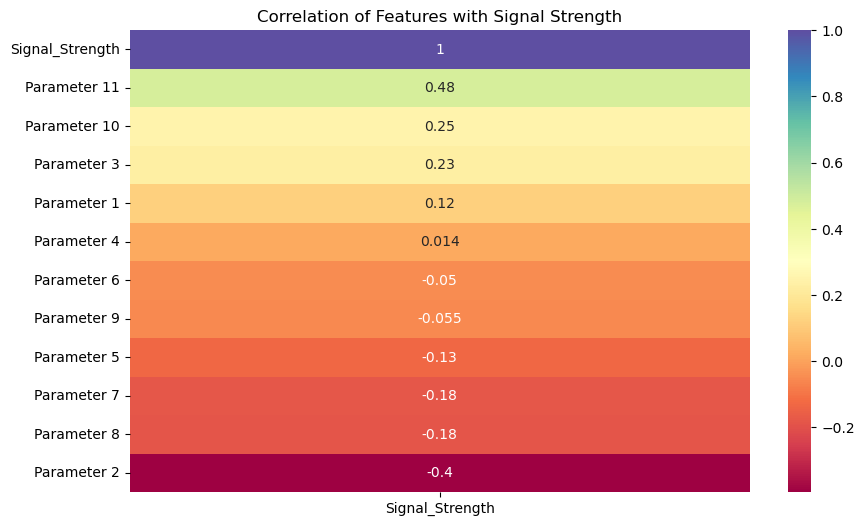

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True)[['Signal_Strength']].sort_values(by='Signal_Strength', ascending=False), annot=True, cmap='Spectral')
plt.title('Correlation of Features with Signal Strength')
plt.show()

<br>

### Insights:
* Maximum signal strength emitted is 5 and 6
* Parameter 11 is highest positive correlated with Signal Strength
* Parameter 2 is highest negative correlated with Signal Strength

<br>

## Model Building

### Split the data into train and test sets

In [19]:
X = data.drop(["Signal_Strength"], axis=1)
y = data["Signal_Strength"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(951, 11)
(408, 11)
(951,)
(408,)


In [22]:
# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Encoding & Label Transformation
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

<br>

## 1. Base Model (One Layer)

### Building the model

In [24]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(y_train_encoded.shape[1], activation='softmax')  # Output layer for multi-class
])

2025-06-06 06:47:33.140393: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-06 06:47:33.146229: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


<br>

### Compile the model

In [25]:
model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 9)                 297       
                                                                 
Total params: 3,145
Trainable params: 3,145
Non-trainable params: 0
_________________________________________________________________


<br>

### Fit the model

In [27]:
history = model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=X_train_scaled.shape[0], validation_data=(X_test_scaled, y_test_encoded))

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 1.9575 - accuracy: 0.3617 - val_loss: 1.9312 - val_accuracy: 0.4167
Epoch 2/50
1/1 [==============================] - 0s 311ms/step - loss: 1.9418 - accuracy: 0.3943 - val_loss: 1.9003 - val_accuracy: 0.4216
Epoch 3/50
1/1 [==============================] - 0s 309ms/step - loss: 1.9094 - accuracy: 0.3859 - val_loss: 1.8699 - val_accuracy: 0.4216
Epoch 4/50
1/1 [==============================] - 0s 291ms/step - loss: 1.8832 - accuracy: 0.3985 - val_loss: 1.8403 - val_accuracy: 0.4216
Epoch 5/50
1/1 [==============================] - 0s 332ms/step - loss: 1.8637 - accuracy: 0.4090 - val_loss: 1.8114 - val_accuracy: 0.4240
Epoch 6/50
1/1 [==============================] - 0s 289ms/step - loss: 1.8393 - accuracy: 0.4090 - val_loss: 1.7832 - val_accuracy: 0.4216
Epoch 7/50
1/1 [==============================] - 0s 355ms/step - loss: 1.8055 - accuracy: 0.4206 - val_loss: 1.7558 - val_accuracy: 0.4216
Epoch 8/50
1/1 [=======

<br>

### Plot Utility

In [28]:
def plot_metrics(history, title_suffix):
    plt.figure(figsize=(12, 5))

    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training vs Validation Loss - {title_suffix}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Training vs Validation Accuracy - {title_suffix}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

<br>

### Training Loss and Validation Loss

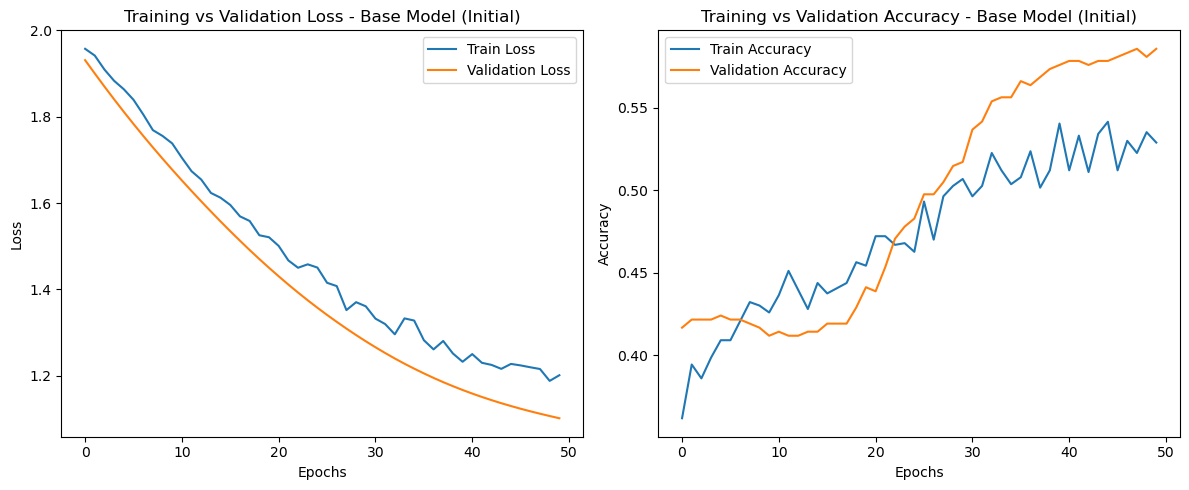

In [29]:
plot_metrics(history, 'Base Model (Initial)')

<br>

In [30]:
metric_data = {
    "Factors": ["Training Loss", "Validation Loss", "Training Accuracy", "Validation Accuracy", "Convergance", "Training Stability", "Generalization"],
}

In [31]:
metric_data["Base Model"] = [1.35, 1.25, "50%", "55%", "Slow", "Noise", "Not optimal"]

<br>

## 2. Improved Model (Multiple Hidden Layer, Weight Initializers)

In [32]:
model_improved = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_initializer='he_uniform'),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_initializer='he_uniform'),
    Dense(y_train_encoded.shape[1], activation='softmax')
])

In [33]:
model_improved.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [34]:
model_improved.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1536      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 9)                 297       
                                                                 
Total params: 12,169
Trainable params: 12,169
Non-trai

In [35]:
history_improved = model_improved.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=X_train_scaled.shape[0], validation_data=(X_test_scaled, y_test_encoded))

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 1.9955 - accuracy: 0.2608 - val_loss: 1.9496 - val_accuracy: 0.3358
Epoch 2/50
1/1 [==============================] - 0s 115ms/step - loss: 1.9288 - accuracy: 0.2965 - val_loss: 1.9006 - val_accuracy: 0.4118
Epoch 3/50
1/1 [==============================] - 0s 156ms/step - loss: 1.8958 - accuracy: 0.3207 - val_loss: 1.8527 - val_accuracy: 0.4289
Epoch 4/50
1/1 [==============================] - 0s 126ms/step - loss: 1.8314 - accuracy: 0.3785 - val_loss: 1.8066 - val_accuracy: 0.4485
Epoch 5/50
1/1 [==============================] - 0s 161ms/step - loss: 1.7872 - accuracy: 0.3985 - val_loss: 1.7611 - val_accuracy: 0.4706
Epoch 6/50
1/1 [==============================] - 0s 139ms/step - loss: 1.7302 - accuracy: 0.4301 - val_loss: 1.7159 - val_accuracy: 0.4755
Epoch 7/50
1/1 [==============================] - 0s 131ms/step - loss: 1.6962 - accuracy: 0.4448 - val_loss: 1.6712 - val_accuracy: 0.4853
Epoch 8/50
1/1 [=======

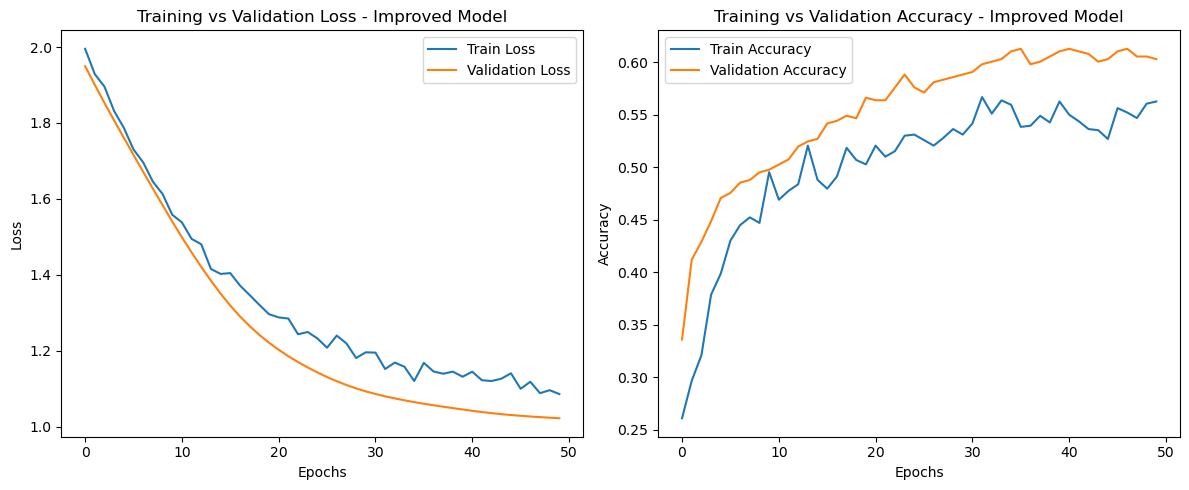

In [36]:
plot_metrics(history_improved, 'Improved Model')

In [37]:
metric_data["Improved Model"] = [1, 0.8, "60%", "65%", "Faster", "Stable", "Excellent"]

## Comparisions:





In [38]:
metric_df = pd.DataFrame(metric_data)
print(metric_df)

               Factors   Base Model Improved Model
0        Training Loss         1.35              1
1      Validation Loss         1.25            0.8
2    Training Accuracy          50%            60%
3  Validation Accuracy          55%            65%
4          Convergance         Slow         Faster
5   Training Stability        Noise         Stable
6       Generalization  Not optimal      Excellent


## Final Notes & Business Recommendation:

### Analysis:
1. Decision Tree (Default Parameter), Random Forest (Default Parameter), Bagging (Default Parameter) are high overfitting and should be ignored.
2. Gradient Boosting with or without tuning is best for achieving high accuracy and precision
3. Bagging Classifier is best if recall is important

### Selected Model: Gradient Boosting (Default Parameters)
#### Reason: 
- As Objective is to automate the process, with increase of applications load per year is higher. Only eligible applicants must be certified, and no inelligible applicant must be certified. In a trade off, very few eligible appicants can be put into rejection in order to create high automation with accuracy.
1. High Accuracy
2. High Precision

### Note: 
- In case business does not want to let any of the eligible applicant to be rejected, then fallback to Bagging Classifier Model with Tuning.